In [6]:
#Data Exploration and cleaning
import warnings 
import seaborn as sns
warnings.filterwarnings("ignore")
# Load the dataset
import pandas as pd
from matplotlib import pyplot as plt 
data = pd.read_csv('election_results_2024.csv', usecols=lambda column: column not in ['ID'])
data.drop_duplicates(inplace=True)
data

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
...,...,...,...,...,...,...,...,...
538,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared
540,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared
541,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,Result Declared


In [7]:
data.head()
data.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


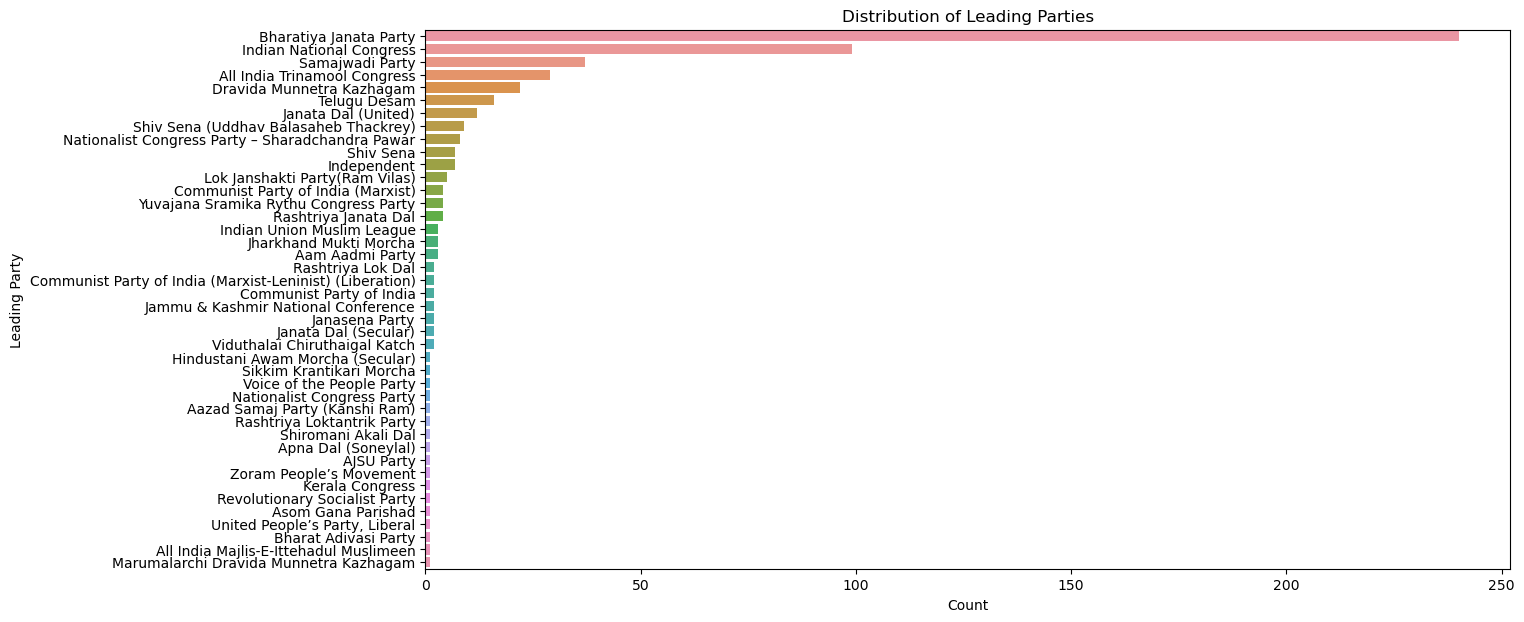

In [9]:
#Leading Parties
plt.figure(figsize=(14, 7))
sns.countplot(y='Leading Party', data=data, order=data['Leading Party'].value_counts().index)
plt.title('Distribution of Leading Parties')
plt.xlabel('Count')
plt.ylabel('Leading Party')
plt.show()

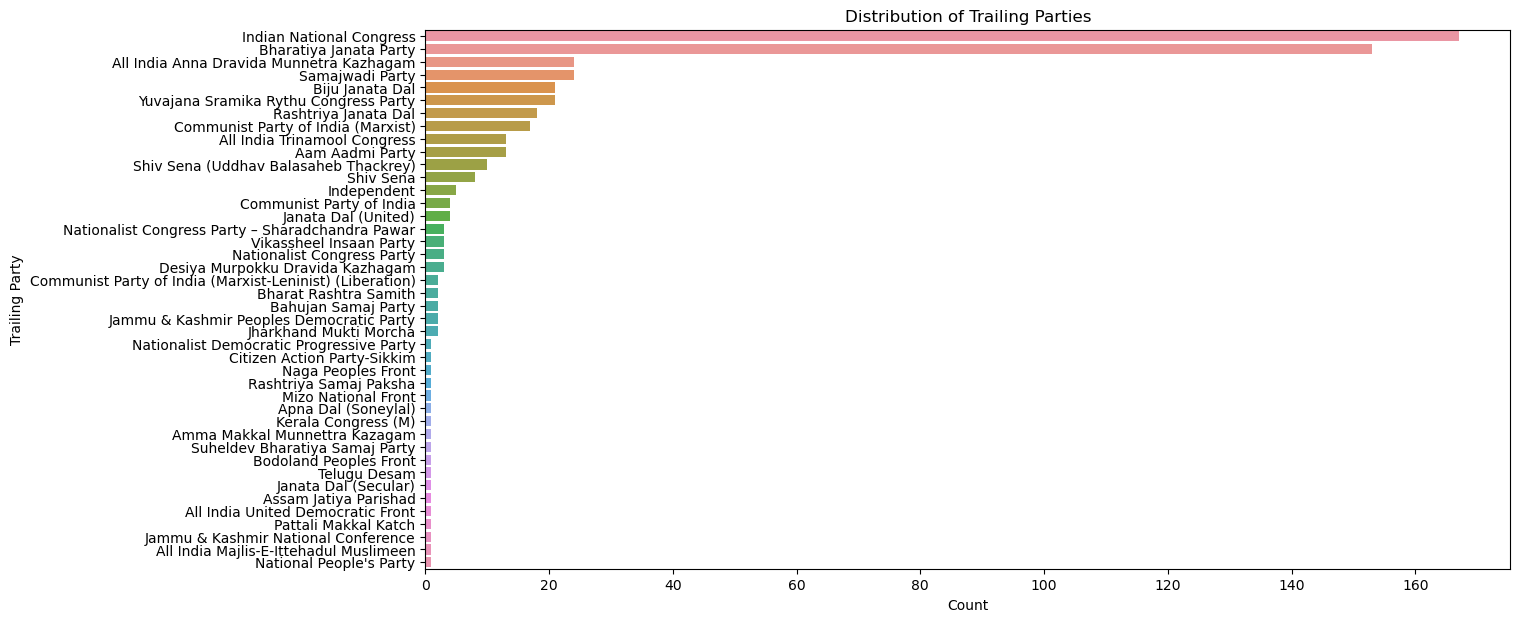

In [10]:
#Trailing Parties
plt.figure(figsize=(14, 7))
sns.countplot(y='Trailing Party', data=data, order=data['Trailing Party'].value_counts().index)
plt.title('Distribution of Trailing Parties')
plt.xlabel('Count')
plt.ylabel('Trailing Party')
plt.show()

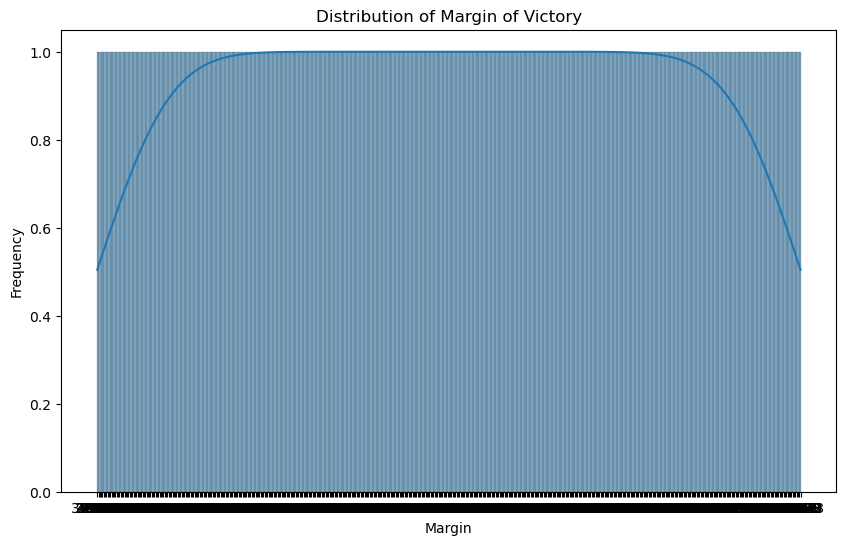

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Margin'], bins=30, kde=True)
plt.title('Distribution of Margin of Victory')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

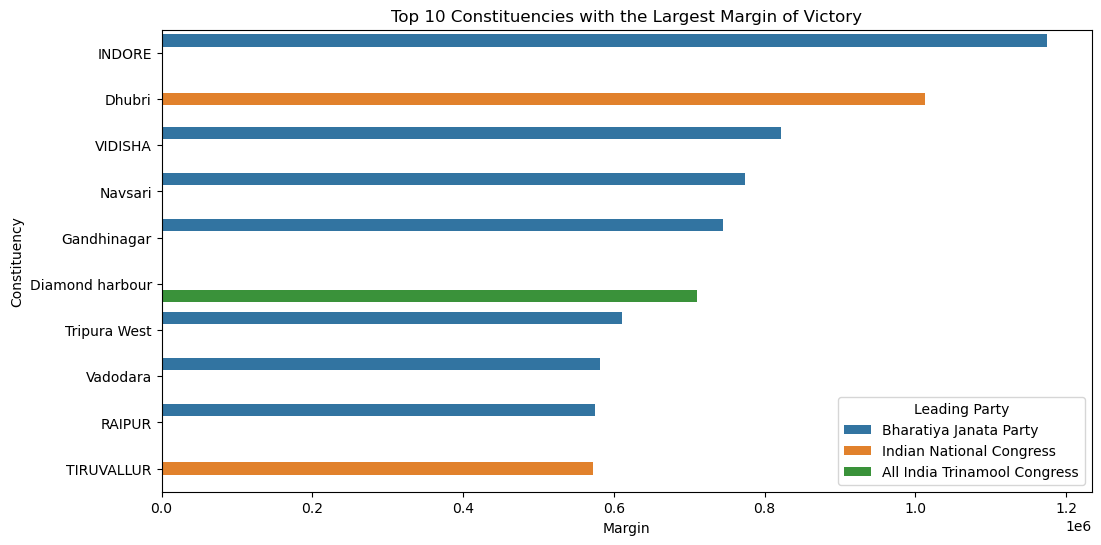

In [12]:
def plot_top_n_margins(df, n=10):
    # Ensure 'Margin' column is converted to string
    df['Margin'] = df['Margin'].astype(str)
    # Replace non-numeric characters and convert to integer
    df['Margin'] = df['Margin'].str.replace(',', '').str.replace('-', '0').astype(int)
    
    # Select top n margins
    top_n_margin = df.nlargest(n, 'Margin')

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Margin', y='Constituency', data=top_n_margin, hue='Leading Party')
    plt.title(f'Top {n} Constituencies with the Largest Margin of Victory')
    plt.xlabel('Margin')
    plt.ylabel('Constituency')
    plt.legend(title='Leading Party')
    plt.show()

# Assuming 'data' is your DataFrame
plot_top_n_margins(data, n=10)

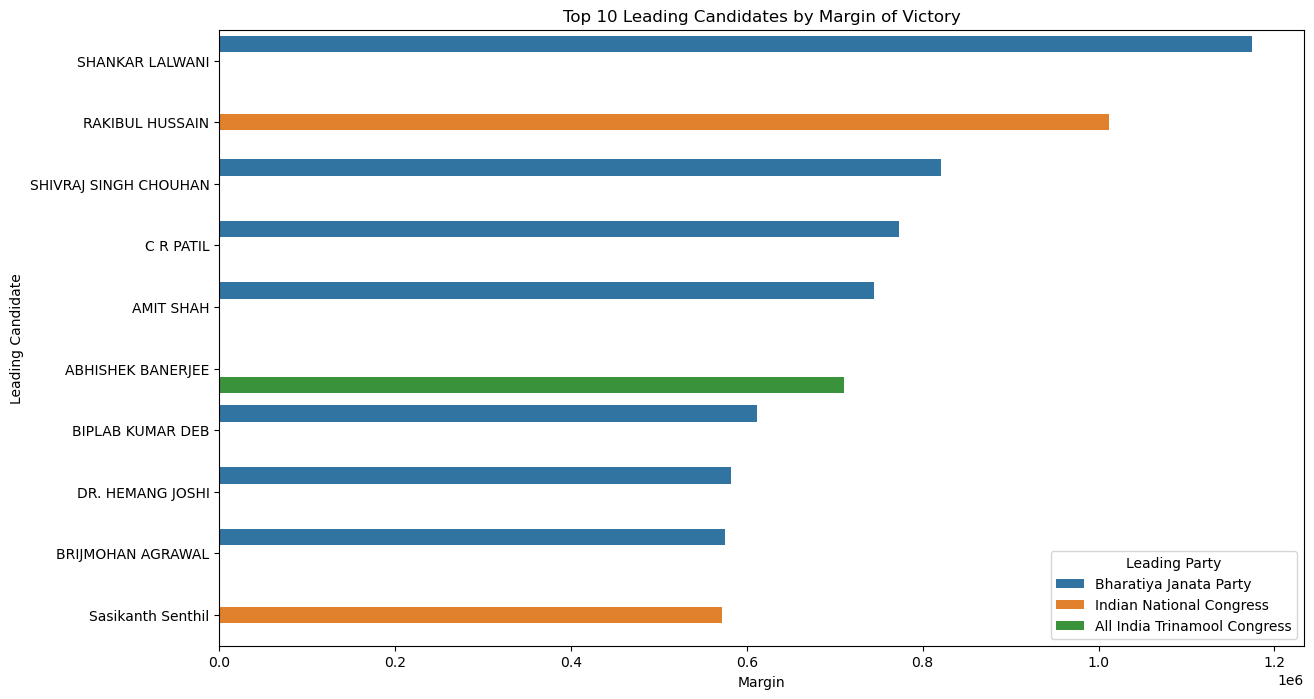

In [13]:
#Top N Candidates with the largest margin of victory¶

def top_n_leading_candidates(data, n=10):
    top_n_candidates = data.nlargest(n, 'Margin')
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Margin', y='Leading Candidate', data=top_n_candidates, hue='Leading Party')
    plt.title(f'Top {n} Leading Candidates by Margin of Victory')
    plt.xlabel('Margin')
    plt.ylabel('Leading Candidate')
    plt.legend(title='Leading Party')
    plt.show()

top_n_leading_candidates(data, n=10)

In [14]:
#Top N Trailing Candidates by Margin of Defeat¶


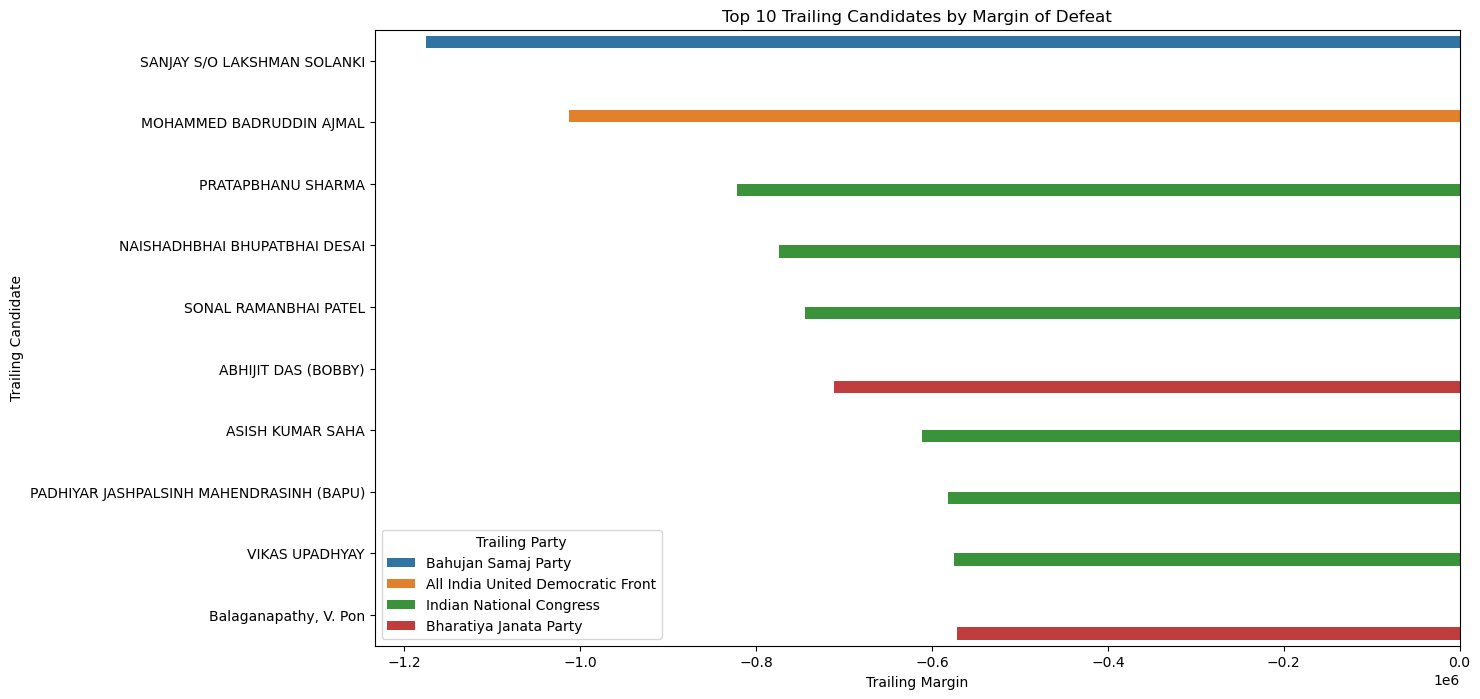

In [15]:
def top_n_trailing_candidates(df, n=10):
    trailing_margin = df.copy()
    trailing_margin['Trailing Margin'] = trailing_margin['Margin'] * -1
    top_n_candidates = trailing_margin.nsmallest(n, 'Trailing Margin')
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Trailing Margin', y='Trailing Candidate', data=top_n_candidates, hue='Trailing Party')
    plt.title(f'Top {n} Trailing Candidates by Margin of Defeat')
    plt.xlabel('Trailing Margin')
    plt.ylabel('Trailing Candidate')
    plt.legend(title='Trailing Party')
    plt.show()

top_n_trailing_candidates(data, n=10)


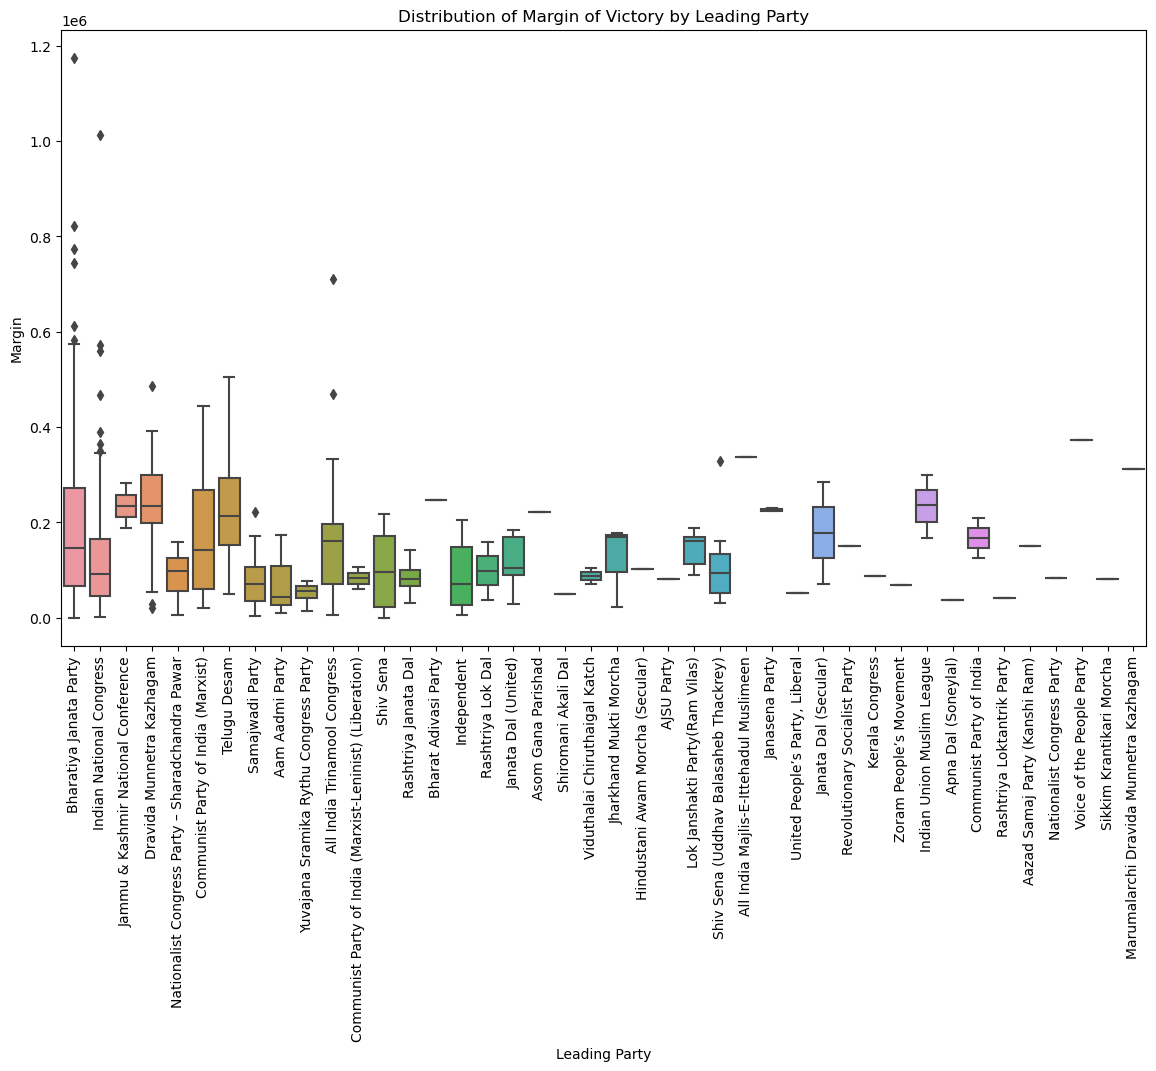

In [16]:
def party_wise_margin_distribution(df):
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Leading Party', y='Margin', data=df)
    plt.title('Distribution of Margin of Victory by Leading Party')
    plt.xlabel('Leading Party')
    plt.ylabel('Margin')
    plt.xticks(rotation=90)
    plt.show()

party_wise_margin_distribution(data)

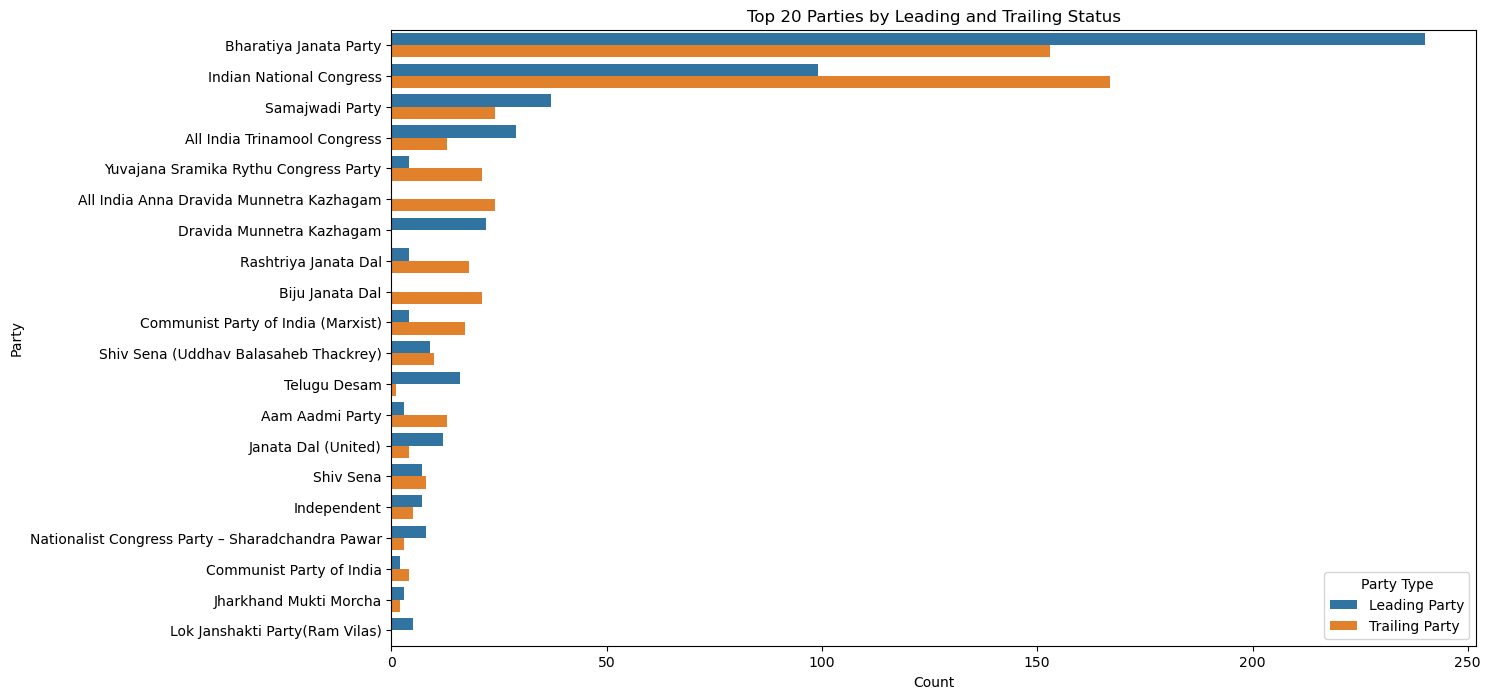

In [17]:
def leading_vs_trailing_parties(df, n=20):
    leading_trailing = df.melt(id_vars=['Constituency'], value_vars=['Leading Party', 'Trailing Party'], 
                               var_name='Party Type', value_name='Party')
    top_n_parties = leading_trailing['Party'].value_counts().index[:n]
    leading_trailing = leading_trailing[leading_trailing['Party'].isin(top_n_parties)]
    plt.figure(figsize=(14, 8))
    sns.countplot(y='Party', hue='Party Type', data=leading_trailing, order=top_n_parties)
    plt.title(f'Top {n} Parties by Leading and Trailing Status')
    plt.xlabel('Count')
    plt.ylabel('Party')
    plt.show()

leading_vs_trailing_parties(data, n=20)

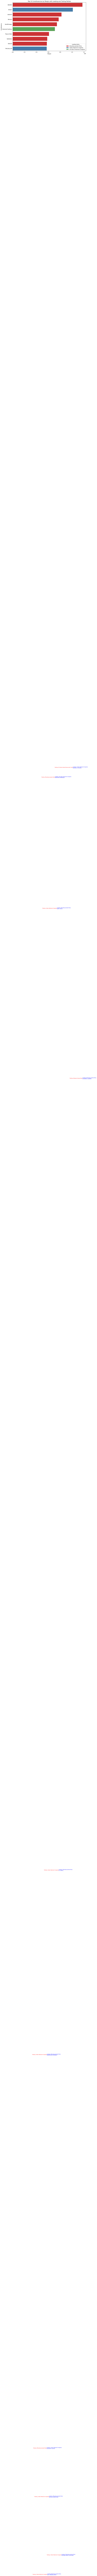

In [28]:
# Select top 10 constituencies based on margin
top_10_constituencies = df.nlargest(10, 'Margin')

# Plotting
plt.figure(figsize=(12, 8))

# Grouped bar plot for leading and trailing parties
sns.barplot(data=top_10_constituencies, x='Margin', y='Constituency', hue='Leading Party', palette='Set1', dodge=False)

# Annotate the bars with leading and trailing candidates
for index, row in top_10_constituencies.iterrows():
    plt.text(row['Margin'], index, f"Leading: {row['Leading Party']}\n({row['Leading Candidate']})", va='center', ha='left', color='blue', fontsize=8)
    plt.text(row['Margin'], index, f"Trailing: {row['Trailing Party']}", va='center', ha='right', color='red', fontsize=8)

plt.title('Top 10 Constituencies by Margin with Leading and Trailing Parties')
plt.xlabel('Margin')
plt.ylabel('Constituency')
plt.tight_layout()
plt.show()

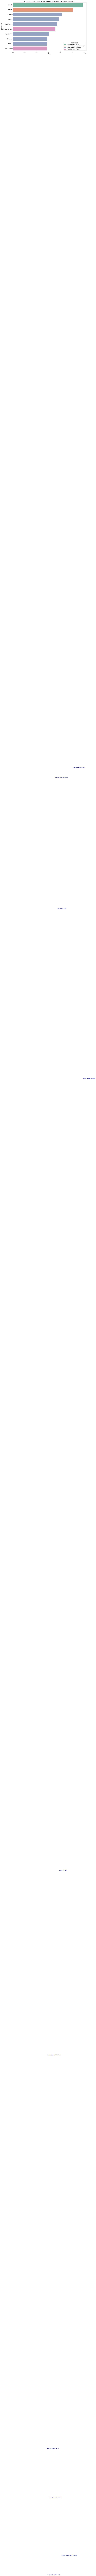

In [29]:
# Plotting
plt.figure(figsize=(12, 8))

# Grouped bar plot for trailing parties with leading candidates
sns.barplot(data=top_10_constituencies, x='Margin', y='Constituency', hue='Trailing Party', palette='Set2', dodge=False)

# Annotate the bars with leading candidates
for index, row in top_10_constituencies.iterrows():
    plt.text(row['Margin'], index, f"Leading: {row['Leading Candidate']}", va='center', ha='left', color='blue', fontsize=8)

plt.title('Top 10 Constituencies by Margin with Trailing Parties and Leading Candidates')
plt.xlabel('Margin')
plt.ylabel('Constituency')
plt.tight_layout()
plt.show()

In [30]:
# Group the data according to the margins
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

data['Margin'] = pd.to_numeric(data['Margin'],errors='coerce')

# Party with highest and lowest margin of victory
highest_margin = data.loc[data['Margin'].idxmax()]
lowest_margin = data.loc[data['Margin'].idxmin()]

In [31]:
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()

# Number of seats won by each party
seats_won = data['Leading Party'].value_counts()

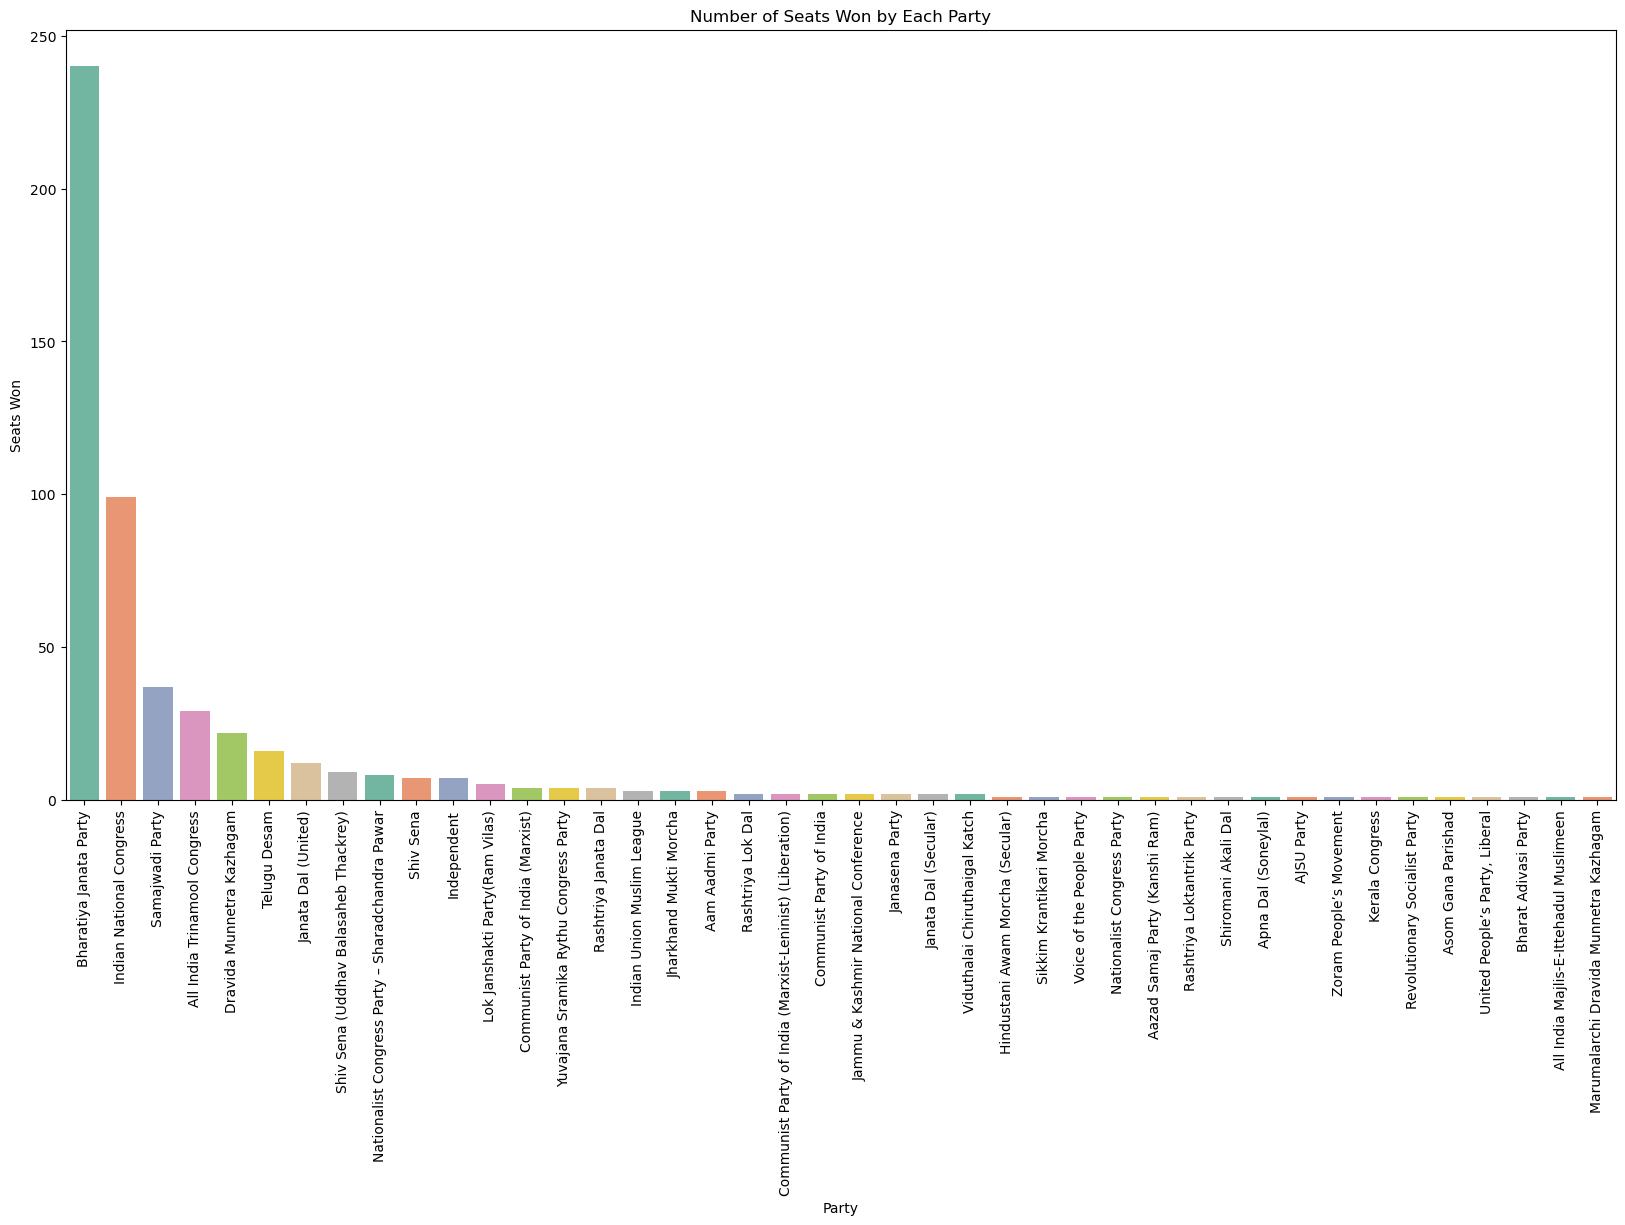

In [32]:
# Plot number of seats won by each party
plt.figure(figsize=(20, 10))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='Set2')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()

In [21]:
# Group the data according to the leading candidates and thier margin of victory in their respective constituencies.
rahul_entries = data[data['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries = data[data['Leading Candidate'] == 'NARENDRA MODI']
amit_entries = data[data['Leading Candidate'] == 'AMIT SHAH']

# Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_votes = rahul_entries['Margin'].values
modi_votes = modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes = amit_entries['Margin'].values[0] if not amit_entries.empty else 0

# Get the original constituency name for Narendra Modi
modi_constituency = modi_entries['Constituency'].values[0] if not modi_entries.empty else "Modi Constituency"

# Get the original constituency names for Rahul Gandhi
rahul_constituencies = list(rahul_entries['Constituency']) if not rahul_entries.empty else "Rahul Constituency"


# Get the original constituency name for Amit Shah
amit_constituency = amit_entries['Constituency'].values[0] if not amit_entries.empty else "Amit Shah Constituency"

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': ['Rahul Gandhi'] * len(rahul_votes) + ['Narendra Modi', 'Amit Shah'],
    'Constituency': rahul_constituencies + [modi_constituency, amit_constituency],
    'Votes': list(rahul_votes) + [modi_votes, amit_votes]
})

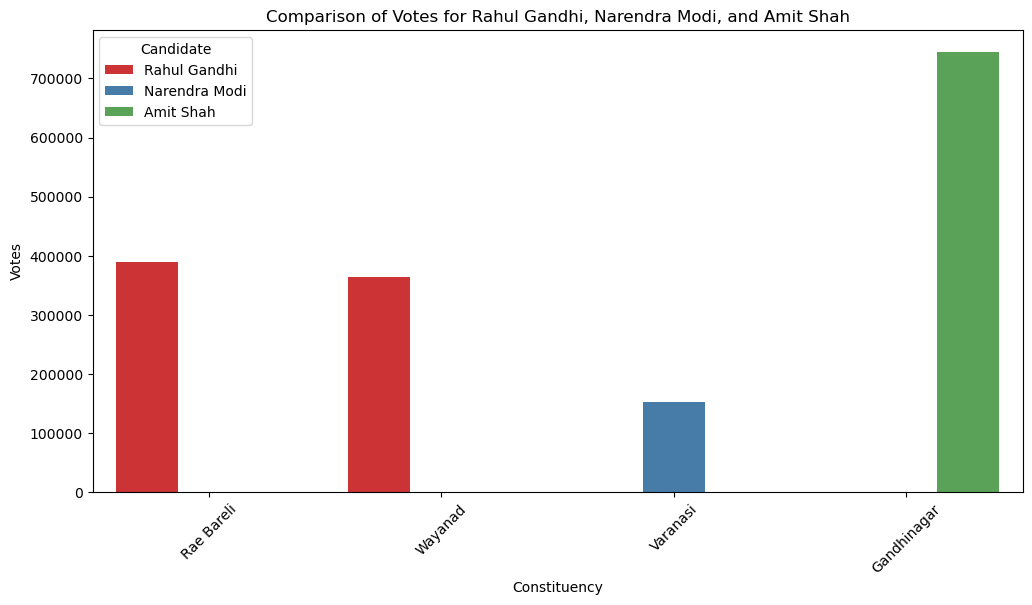

In [22]:
# Plot the comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='Set1')
plt.title('Comparison of Votes for Rahul Gandhi, Narendra Modi, and Amit Shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()

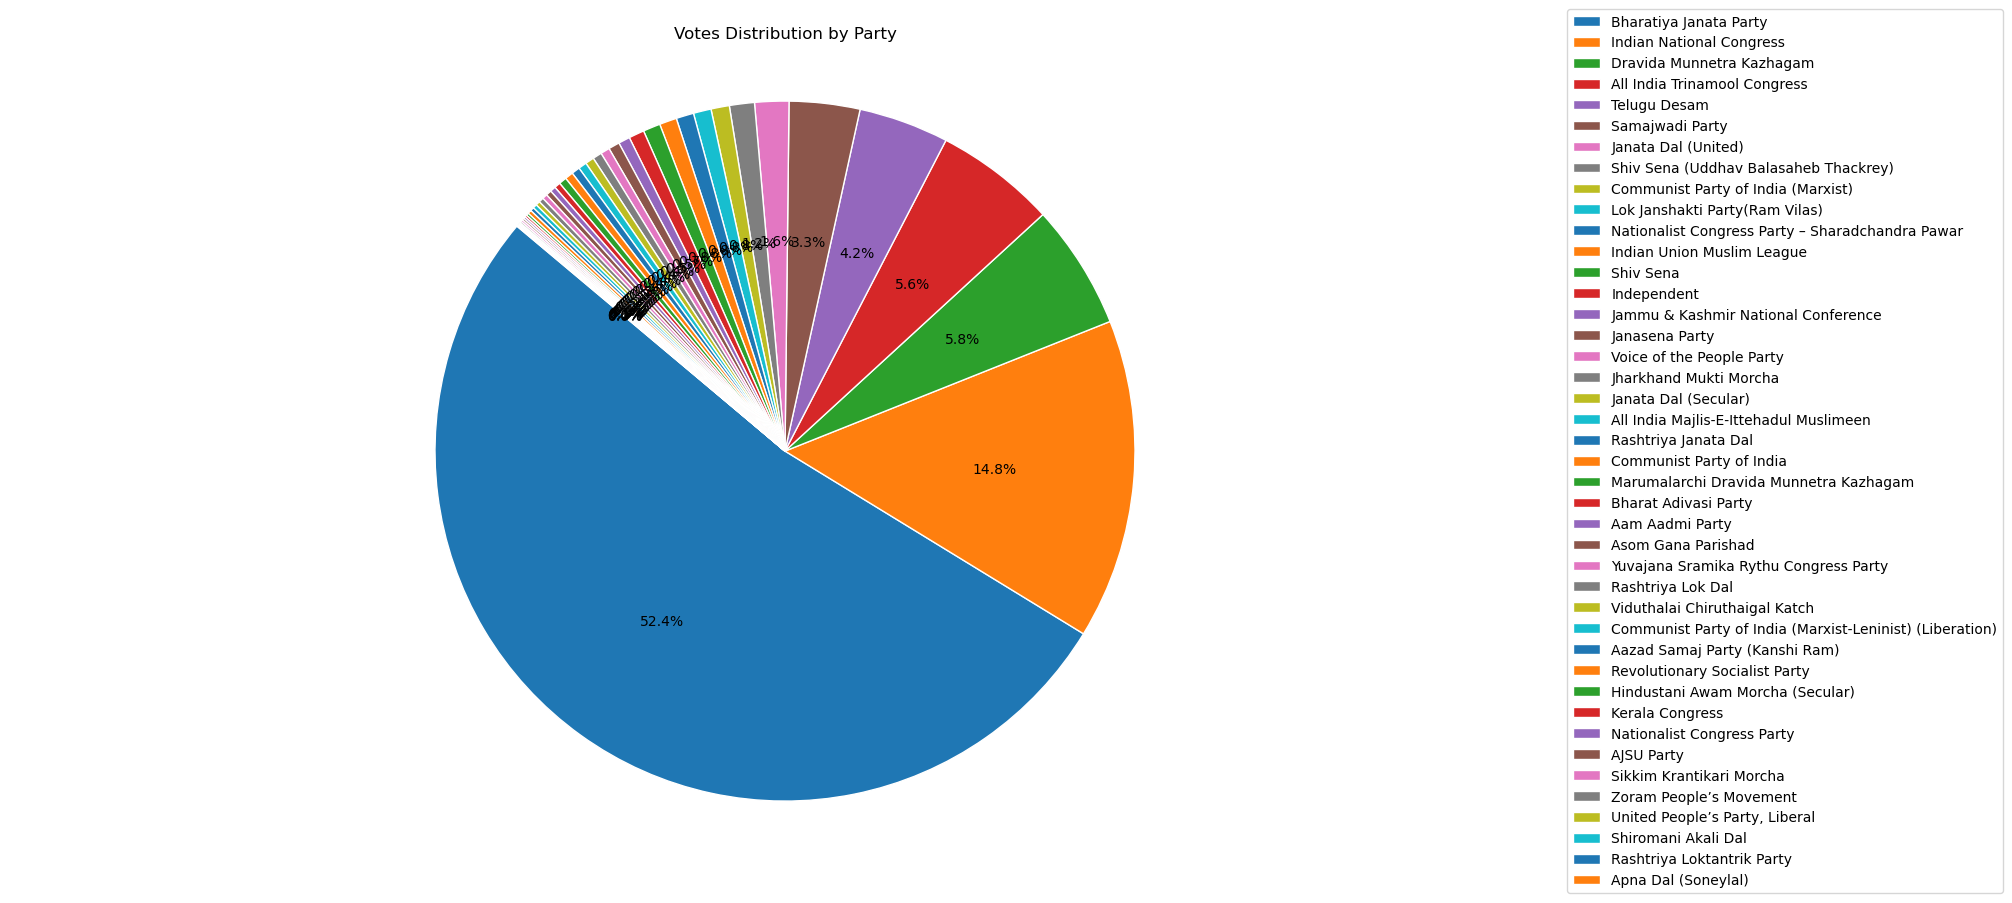

In [23]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
# Plot pie chart

plt.figure(figsize=(20, 10))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')


plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(4, 0, 'Communist Party of India (Marxist)'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Biju Janata Dal'),
  Text(7, 0, 'Rashtriya Janata Dal'),
  Text(8, 0, 'Bahujan Samaj Party'),
  Text(9, 0, 'Aam Aadmi Party')])

<Figure size 2000x600 with 0 Axes>

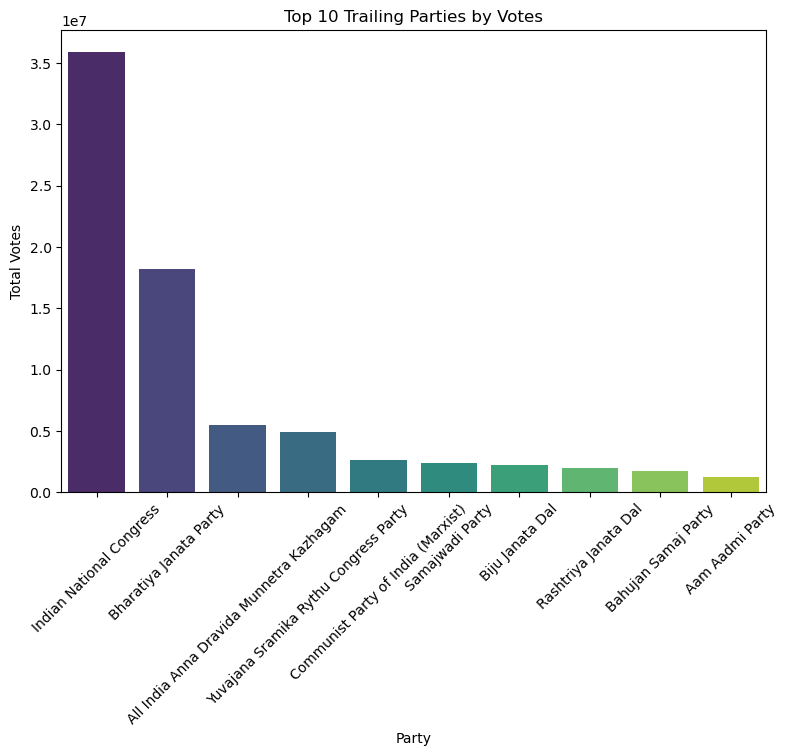

In [24]:
trailing_party_votes = data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = data['Trailing Party'].value_counts()

plt.figure(figsize=(20, 6))

# Plot votes distribution by trailing party
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)

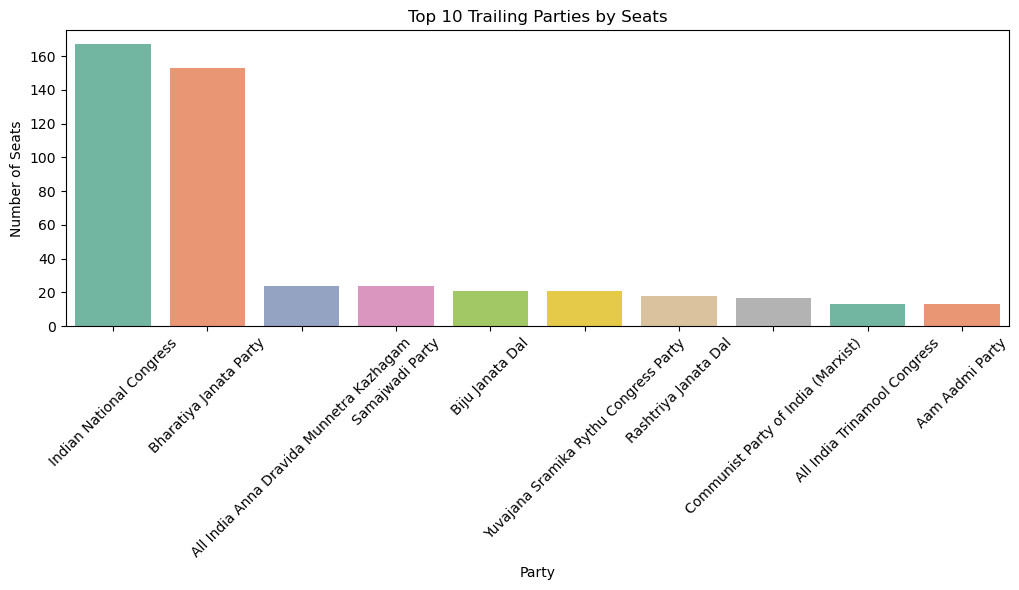

In [25]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='Set2')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [40]:
# Count the occurrences of each party in the "Leading Party" column
party_seat_counts = df['Leading Party'].value_counts().reset_index()
party_seat_counts.columns = ['Party', 'Seats Won']

print("Total Number of Seats Won by Each Party:")
print(party_seat_counts)

Total Number of Seats Won by Each Party:
                                                Party  Seats Won
0                              Bharatiya Janata Party        240
1                            Indian National Congress         99
2                                     Samajwadi Party         37
3                        All India Trinamool Congress         29
4                           Dravida Munnetra Kazhagam         22
5                                        Telugu Desam         16
6                                 Janata Dal (United)         12
7               Shiv Sena (Uddhav Balasaheb Thackrey)          9
8    Nationalist Congress Party – Sharadchandra Pawar          8
9                                           Shiv Sena          7
10                                        Independent          7
11                     Lok Janshakti Party(Ram Vilas)          5
12                 Communist Party of India (Marxist)          4
13              Yuvajana Sramika Rythu Congress P

Total Number of Margins for Each Party:
                                       Party  Total Margin
14                    Bharatiya Janata Party      64242390
25                  Indian National Congress      48878125
5               All India Trinamool Congress       5860726
3   All India Anna Dravida Munnetra Kazhagam       5519091
49                           Samajwadi Party       5234709
..                                       ...           ...
16                    Bodoland Peoples Front         51583
42  Nationalist Democratic Progressive Party         50984
50                       Shiromani Akali Dal         49656
46                Rashtriya Loktantrik Party         42225
43                      Pattali Makkal Katch         21300

[62 rows x 2 columns]


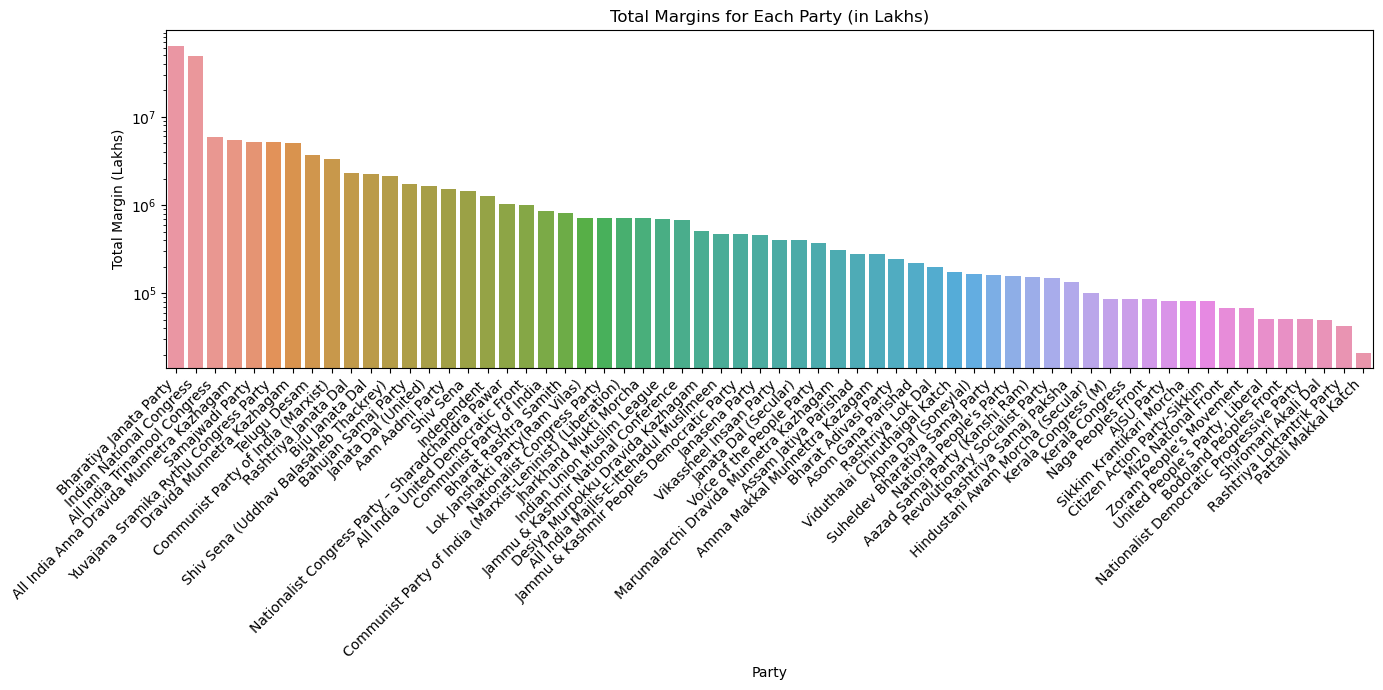

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Create DataFrame
df = pd.DataFrame(data)

# Group by leading and trailing parties and sum the margins
leading_party_margins = df.groupby('Leading Party')['Margin'].sum().reset_index()
trailing_party_margins = df.groupby('Trailing Party')['Margin'].sum().reset_index()

# Rename columns for clarity
leading_party_margins.columns = ['Party', 'Total Margin']
trailing_party_margins.columns = ['Party', 'Total Margin']

# Combine both dataframes
combined_margins = pd.concat([leading_party_margins, trailing_party_margins], axis=0)

# Group by party and sum the margins again to get the total margins
total_margins = combined_margins.groupby('Party')['Total Margin'].sum().reset_index()

# Sort by Total Margin
total_margins = total_margins.sort_values(by='Total Margin', ascending=False)

print("Total Number of Margins for Each Party:")
print(total_margins)

# Visualize the results with logarithmic scale for Y-axis
plt.figure(figsize=(14, 7))
sns.barplot(x='Party', y='Total Margin', data=total_margins)
plt.title('Total Margins for Each Party (in Lakhs)')
plt.xlabel('Party')
plt.ylabel('Total Margin (Lakhs)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()